In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
rice=pd.read_excel("Rice.xlsx")

In [7]:
rice.head()

AREA  PERIMETER  MAJOR_AXIS  MINOR_AXIS  ECCENTRICITY   EQDIASQ  SOLIDITY  \
0  7805    437.915    209.8215     48.0221        0.9735   99.6877    0.9775   
1  7503    340.757    138.3361     69.8417        0.8632   97.7400    0.9660   
2  5124    314.617    141.9803     46.5784        0.9447   80.7718    0.9721   
3  7990    437.085    201.4386     51.2245        0.9671  100.8622    0.9659   
4  7433    342.893    140.3350     68.3927        0.8732   97.2830    0.9831   

   CONVEX_AREA  EXTENT  ASPECT_RATIO  ...  ALLdaub4L  ALLdaub4a  ALLdaub4b  \
0         7985  0.3547        4.3693  ...   113.9924    65.0610    59.5989   
1         7767  0.6637        1.9807  ...   105.7055    64.3685    62.2084   
2         5271  0.4760        3.0482  ...   109.7155    62.6423    58.7439   
3         8272  0.6274        3.9325  ...   116.5405    64.9069    60.2562   
4         7561  0.6006        2.0519  ...   107.7502    64.7071    61.3549   

   ALLdaub4Y  ALLdaub4Cb  ALLdaub4Cr  ALLdaub4XX  ALLdaub4YY  ALLdaub4ZZ  \
0   104.8552     67.8779     63.0828      0.3673      0.3793      0.4733   
1    96.8375     65.5371     63.5832      0.3014      0.3144      0.3641   
2   100.2352     68.9753     59.8342      0.3233      0.3445      0.4448   
3   107.2560     67.3298     63.2237      0.3880      0.4020      0.4904   
4    98.8704     66.2048     63.5378      0.3184      0.3303      0.3928   

     CLASS  
0  Basmati  
1  Arborio  
2  Jasmine  
3  Basmati  
4  Arborio  

[5 rows x 107 columns]

In [3]:
null=rice.isnull().sum()
columns_with_nulls = null[null > 0]
print(columns_with_nulls)

skewB         6
kurtosisB     6
skewCb        3
skewCr        2
kurtosisCb    3
kurtosisCr    2
dtype: int64


<Figure size 1000x800 with 0 Axes>

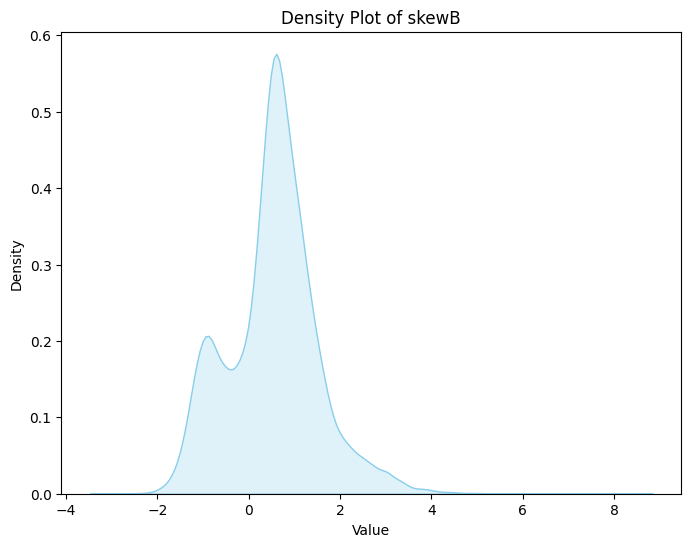

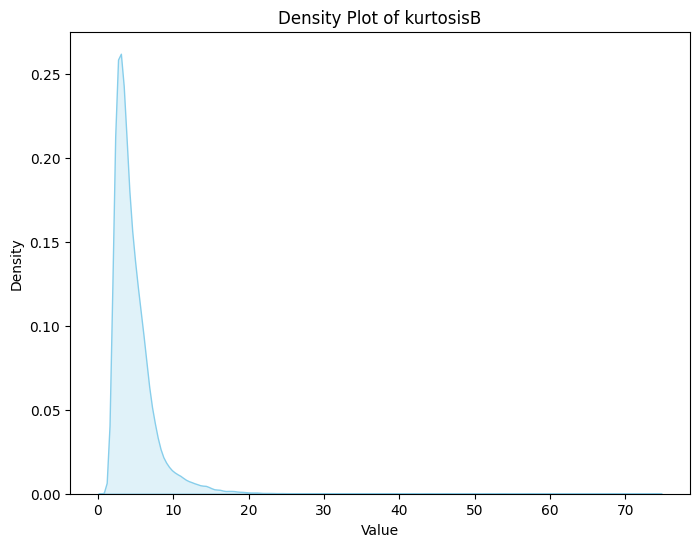

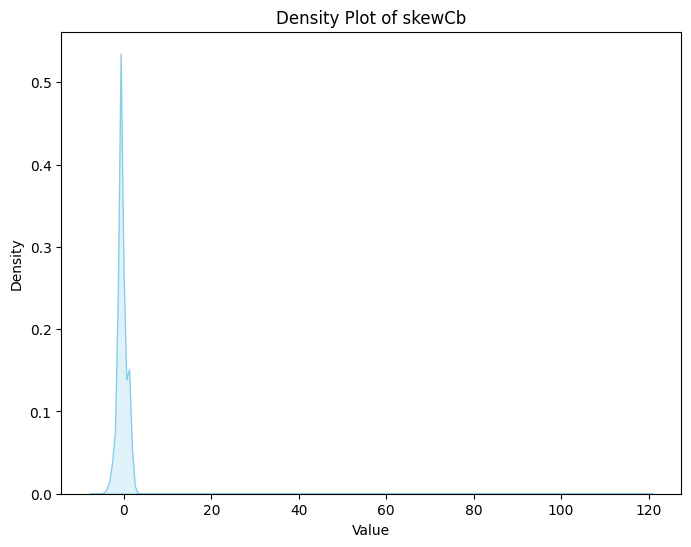

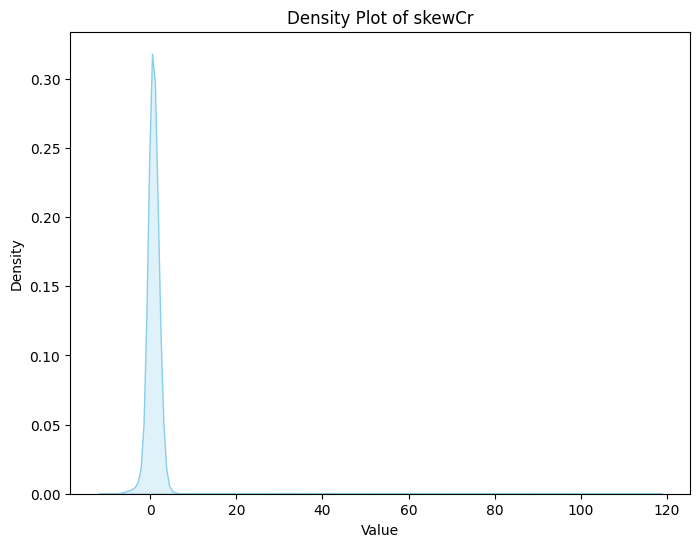

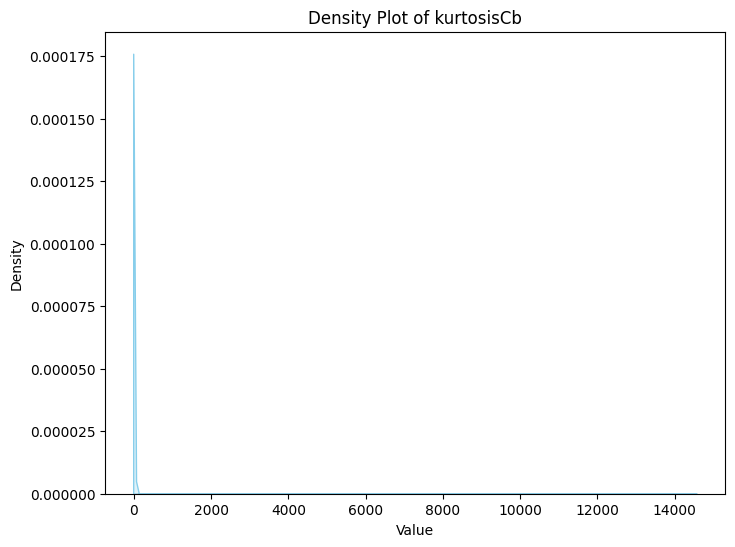

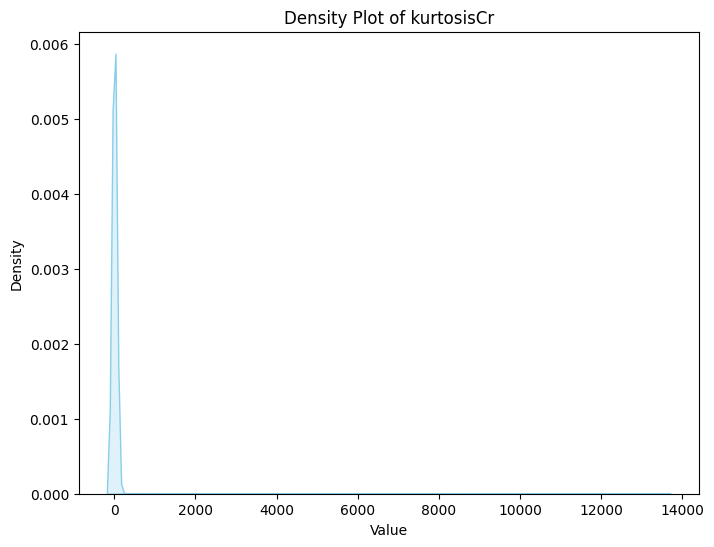

In [4]:
plt.figure(figsize=(10, 8))
selected_columns = ['skewB', 'kurtosisB', 'skewCb', 'skewCr', 'kurtosisCb', 'kurtosisCr']
for column in selected_columns:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(rice[column], fill=True, color='skyblue')
    plt.title(f'Density Plot of {column}')
    plt.xlabel('Value')
    plt.ylabel('Density')
    plt.show()

In [5]:
for column in selected_columns:
    rice[column] = rice[column].fillna(rice[column].median())

In [6]:
null=rice.isnull().sum()
columns_with_nulls = null[null > 0]
print(columns_with_nulls)

Series([], dtype: int64)


<ipython-input-9-780a0671997b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CLASS', y=var, data=avg_values, ax=axes[i], palette='viridis')
<ipython-input-9-780a0671997b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CLASS', y=var, data=avg_values, ax=axes[i], palette='viridis')
<ipython-input-9-780a0671997b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='CLASS', y=var, data=avg_values, ax=axes[i], palette='viridis')
<ipython-input-9-780a0671997b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecate

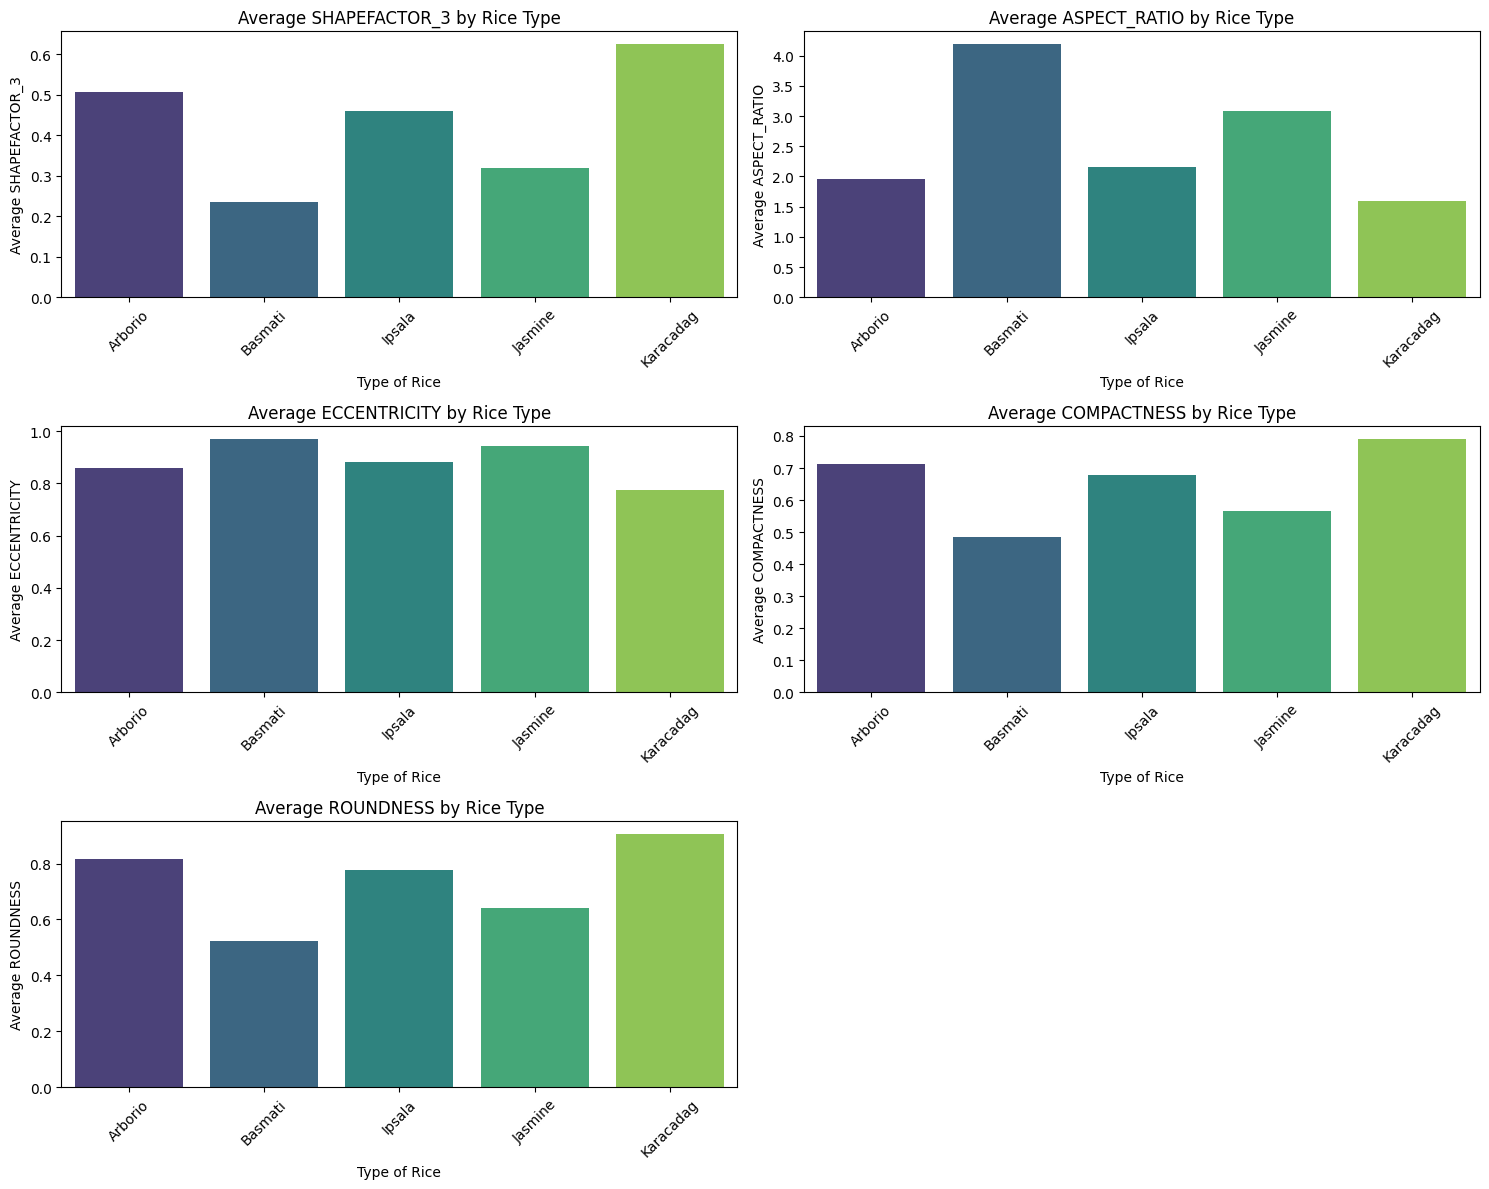

In [9]:
variables = ['SHAPEFACTOR_3', 'ASPECT_RATIO', 'ECCENTRICITY', 'COMPACTNESS', 'ROUNDNESS']

# Set up the figure and axes for 5 subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 12))
axes = axes.flatten()

# Loop through the variables and create a plot for each
for i, var in enumerate(variables):
    avg_values = rice.groupby('CLASS')[var].mean().reset_index()
    sns.barplot(x='CLASS', y=var, data=avg_values, ax=axes[i], palette='viridis')
    axes[i].set_title(f'Average {var} by Rice Type')
    axes[i].set_xlabel('Type of Rice')
    axes[i].set_ylabel(f'Average {var}')
    axes[i].tick_params(axis='x', rotation=45)

# Remove the last subplot (bottom-right) if unnecessary
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

In [7]:
X=rice.drop(columns=["CLASS"])
y=rice["CLASS"]

In [10]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

In [11]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [12]:
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9958


In [13]:
class_names = sorted(rice['CLASS'].unique())
cm = confusion_matrix(y_test, y_pred,labels=class_names)

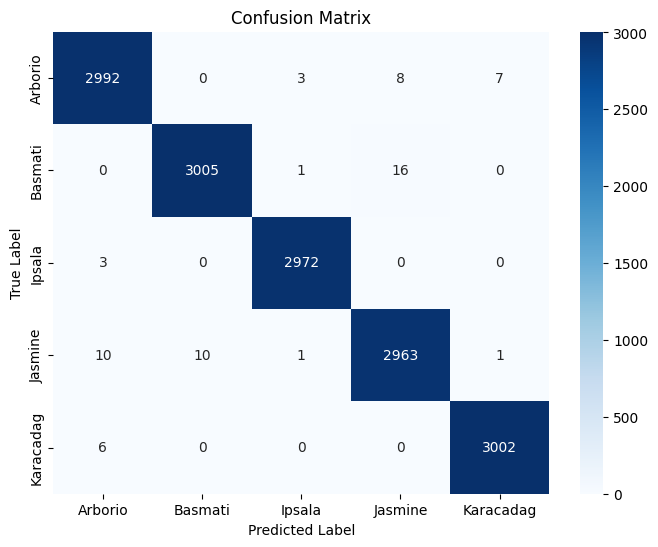

In [18]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [14]:
from sklearn.pipeline import Pipeline
from tqdm import tqdm_notebook as tqdm


In [15]:
from sklearn import tree
seq_steps = [('dt', tree.DecisionTreeClassifier())]
pipeline = Pipeline(seq_steps)
print(pipeline)

Pipeline(steps=[('dt', DecisionTreeClassifier())])


In [16]:
#from sklearn.externals.six import StringIO
from six import StringIO
from IPython.display import Image
from sklearn import tree
import pydotplus

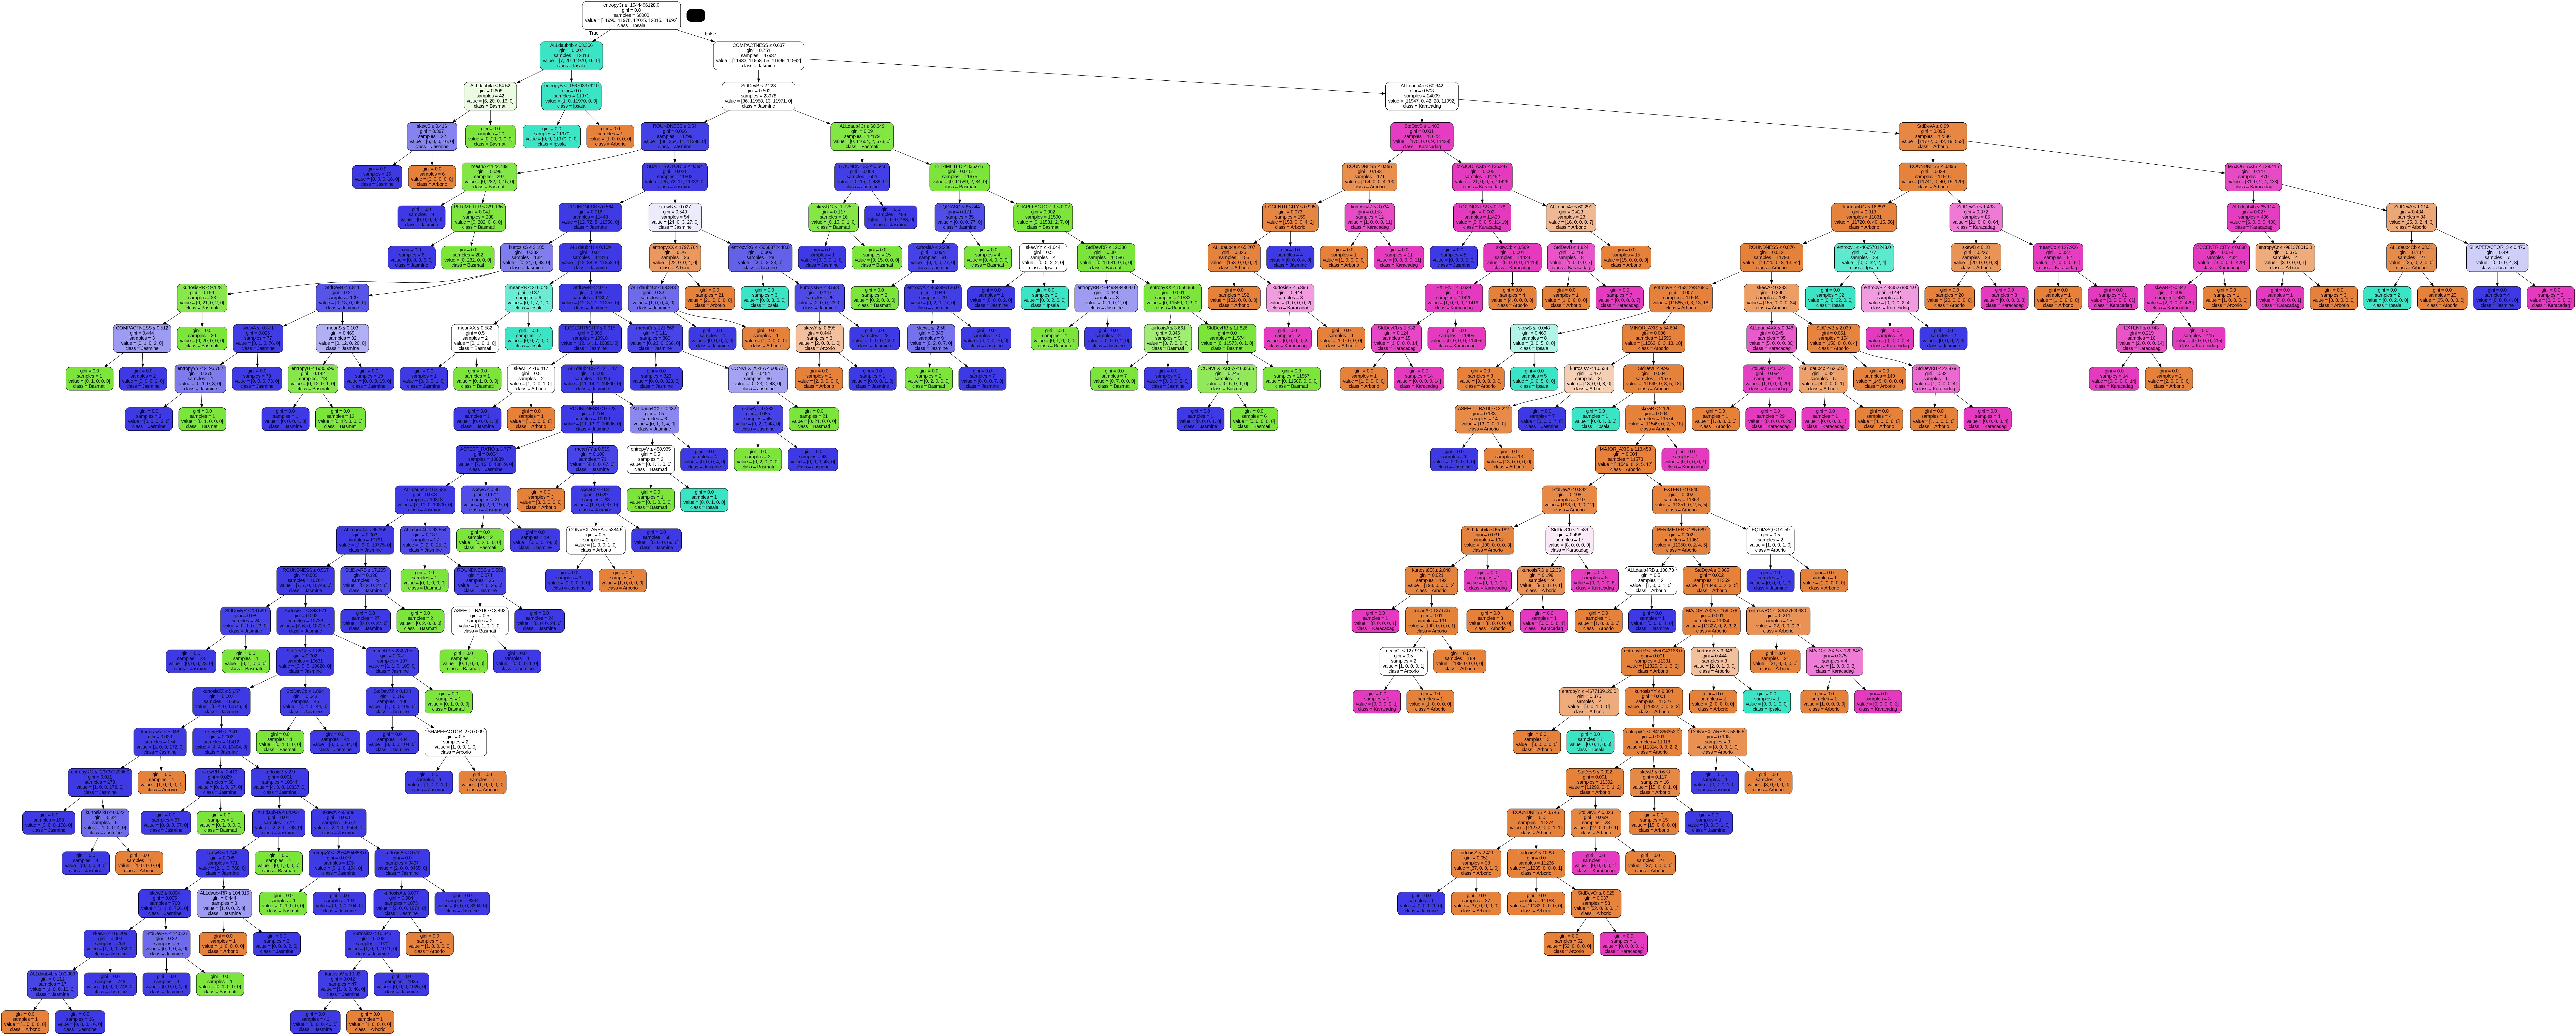

In [17]:
feature_names = X_train.columns

# Export the decision tree to a DOT format
output_file = StringIO()
tree.export_graphviz(clf, out_file=output_file,
                     feature_names=feature_names,
                     class_names=class_names,
                     filled=True, rounded=True,
                     special_characters=True)

# Convert DOT data to a graph
graph = pydotplus.graph_from_dot_data(output_file.getvalue())

# Write the graph to a PNG file
graph.write_png("decision_tree.png")

# Display the image
Image(graph.create_png())

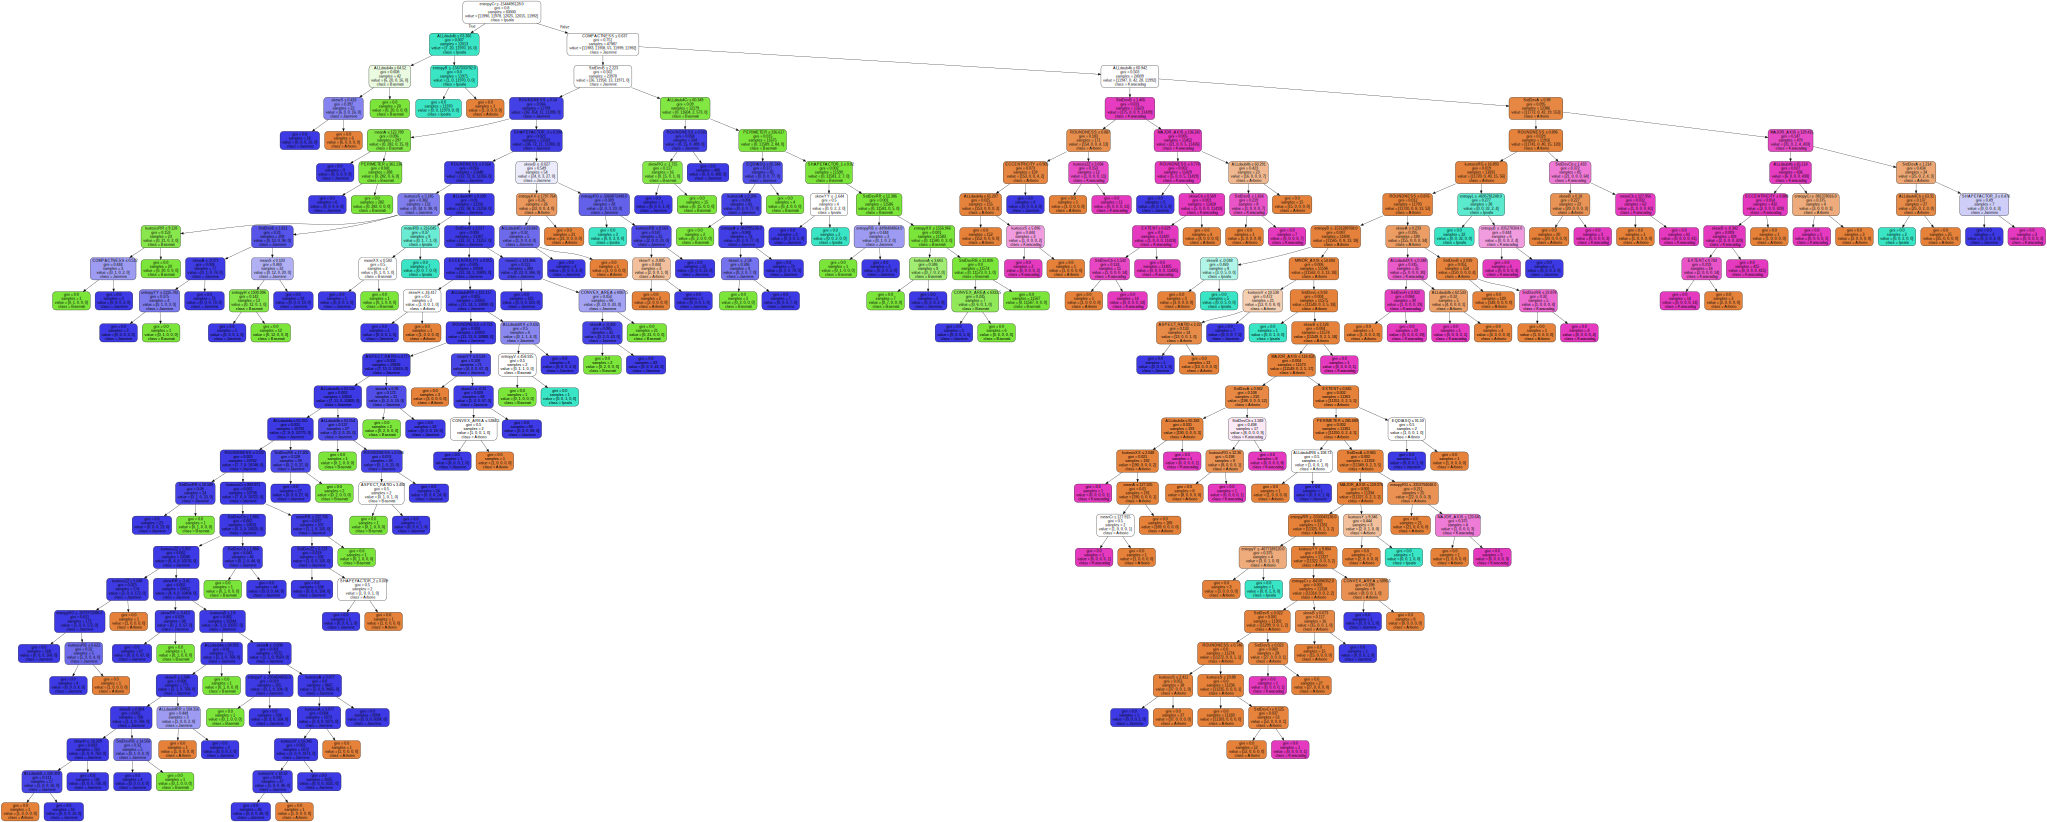

In [20]:
import graphviz

vis_tree = tree.export_graphviz(clf,out_file=None,
                                feature_names=X_train.columns,
                                class_names=class_names,
                                filled=True, rounded=True,
                                special_characters=True)

graph = graphviz.Source(vis_tree)
graph.render("dia_decision_tree")
graph.view
graph

In [19]:
criterion = ['gini','entropy']     #2
max_features = [None, 'auto', 'log2','sqrt'] #4
max_depth = [2,3,4] #3
min_samples_split = [50,75,100,120] #4
min_samples_leaf = [50, 75] #2
class_weight = ['balanced',None] #2

# Create the grid
random_grid = {'dt__criterion': criterion,
               'dt__max_features' :  max_features,
               'dt__max_depth' :  max_depth,
               'dt__min_samples_split': min_samples_split,
               'dt__min_samples_leaf' : min_samples_leaf,
               'dt__class_weight' : class_weight}
random_grid

{'dt__criterion': ['gini', 'entropy'],
 'dt__max_features': [None, 'auto', 'log2', 'sqrt'],
 'dt__max_depth': [2, 3, 4],
 'dt__min_samples_split': [50, 75, 100, 120],
 'dt__min_samples_leaf': [50, 75],
 'dt__class_weight': ['balanced', None]}

In [21]:
# Use the random grid to search for best hyperparameters
from sklearn.model_selection import GridSearchCV

#tree_model = tree.DecisionTreeClassifier(random_state=42)

# Random search of parameters, using 3,4 and 5 fold cross validation,

for cv in tqdm(range(3,6)):
    best_tree_model = GridSearchCV(estimator = pipeline, param_grid = random_grid,
                                   scoring = "balanced_accuracy", cv = cv)
    # Fit the random search model
    best_tree_model.fit(X_train, y_train.values.ravel())
    print("performance for %d fold CV = %2.2f" %(cv, best_tree_model.score(X_test,y_test)))
    print("best parameters for %d fold CV" %(cv))
    print(best_tree_model.best_params_)

<ipython-input-21-414c1dfa84c5>:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for cv in tqdm(range(3,6)):


  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
288 fits failed out of a total of 1152.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
288 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pyt

performance for 3 fold CV = 0.99
best parameters for 3 fold CV
{'dt__class_weight': 'balanced', 'dt__criterion': 'gini', 'dt__max_depth': 4, 'dt__max_features': None, 'dt__min_samples_leaf': 50, 'dt__min_samples_split': 120}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
384 fits failed out of a total of 1536.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
384 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pyt

performance for 4 fold CV = 0.99
best parameters for 4 fold CV
{'dt__class_weight': None, 'dt__criterion': 'gini', 'dt__max_depth': 4, 'dt__max_features': None, 'dt__min_samples_leaf': 50, 'dt__min_samples_split': 50}


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
480 fits failed out of a total of 1920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
480 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 427, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/pyt

performance for 5 fold CV = 0.99
best parameters for 5 fold CV
{'dt__class_weight': None, 'dt__criterion': 'gini', 'dt__max_depth': 4, 'dt__max_features': None, 'dt__min_samples_leaf': 50, 'dt__min_samples_split': 50}


In [26]:
best_tree_model.best_params_

{'dt__class_weight': None,
 'dt__criterion': 'gini',
 'dt__max_depth': 4,
 'dt__max_features': None,
 'dt__min_samples_leaf': 50,
 'dt__min_samples_split': 50}

In [27]:
def get_predictions ( test_class, model, test_data ):
    y_pred_df = pd.DataFrame( { 'actual_class': test_class,
                               'predicted_value': clf.predict(test_data)})
    return y_pred_df

In [28]:
best_tree_model_df = pd.DataFrame(get_predictions(y_test, best_tree_model, X_test))
best_tree_model_df.head()

actual_class predicted_value
11591       Ipsala          Ipsala
52020    Karacadag       Karacadag
34666      Arborio         Arborio
22169      Basmati         Basmati
23049      Basmati         Basmati

In [29]:
def draw_cm( actual, predicted ):
    plt.figure(figsize=(9,9))
    cm = metrics.confusion_matrix( actual, predicted )
    sns.heatmap(cm, annot=True,  fmt='.0f', xticklabels = class_names ,
               yticklabels = class_names,cmap = 'Blues_r')
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.title('Classification Matrix Plot', size = 5);
    plt.show()

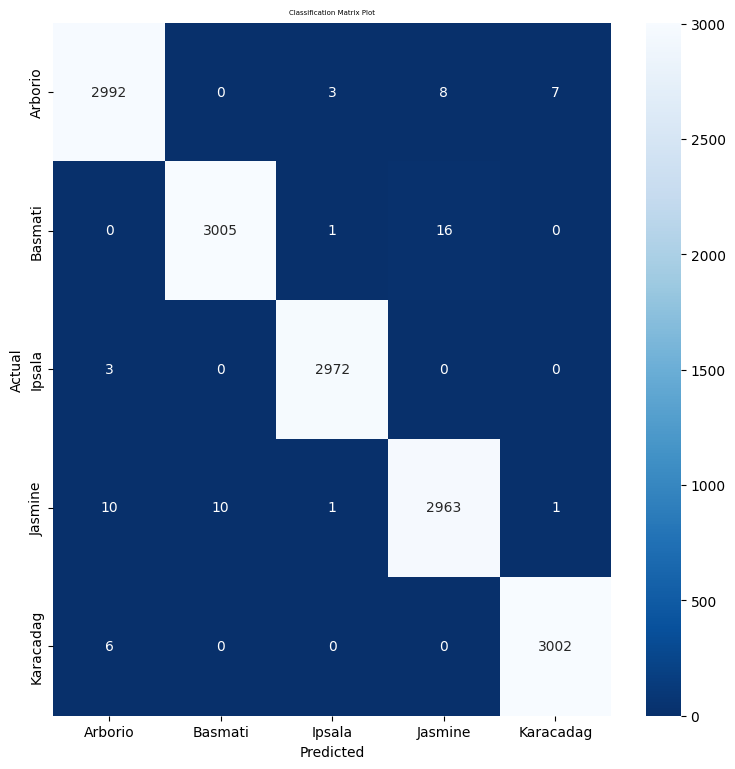

In [30]:
draw_cm( best_tree_model_df.actual_class, best_tree_model_df.predicted_value )

In [29]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [32]:
rf_model=RandomForestClassifier(random_state=42)

In [33]:
rf_model.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred_rf=rf_model.predict(X_test)

In [39]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.9984666666666666


In [35]:
class_names = sorted(rice['CLASS'].unique())
cm = confusion_matrix(y_test, y_pred_rf,labels=class_names)

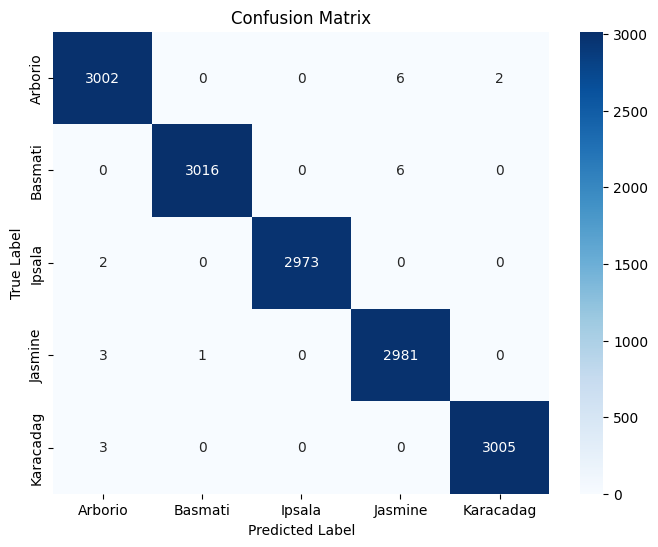

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

SHAPEFACTOR_3    0.085089
ASPECT_RATIO     0.066433
ECCENTRICITY     0.065999
COMPACTNESS      0.065490
ROUNDNESS        0.044117
entropyCr        0.041022
StdDevB          0.040563
meanCb           0.032217
MAJOR_AXIS       0.031030
entropyA         0.030696
ALLdaub4b        0.030263
StdDevCb         0.030081
entropyB         0.028275
PERIMETER        0.027692
ALLdaub4Cb       0.024371
SHAPEFACTOR_2    0.021858
SHAPEFACTOR_1    0.020799
meanB            0.020637
meanS            0.017012
entropyRR        0.015798
dtype: float64


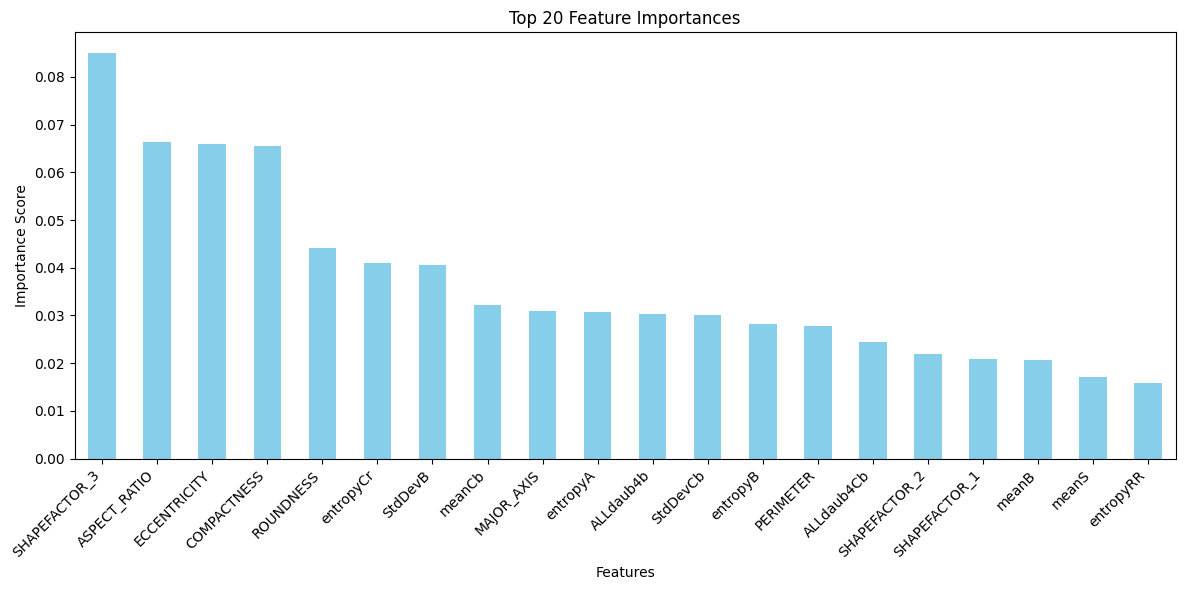

In [38]:
# Get feature importances
importances = rf_model.feature_importances_

# Convert to a pandas Series for easier manipulation
feature_importances = pd.Series(importances, index=X.columns)

# Sort the features by importance
important_features = feature_importances.sort_values(ascending=False)

# Select the top N features (e.g., top 20)
top_features = important_features.head(20)
print(top_features)

# Plotting the bar graph
plt.figure(figsize=(12, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title('Top 20 Feature Importances')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Filter the dataset to include only the top 20 features
top_20_feature_names = important_features.head(20).index  # Get the names of the top 20 features
X_top_20 = X[top_20_feature_names]  # Select only these features


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_top_20, y, test_size=0.2, random_state=42)

In [ ]:
rf_top_20 = RandomForestClassifier(n_estimators=100, random_state=42)

In [ ]:
rf_top_20.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred_rf_20=rf_top_20.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred_rf_20))

Accuracy: 0.9978666666666667


In [ ]:
dt_20= DecisionTreeClassifier(random_state=42)

In [ ]:
dt_20.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred_dt_20=dt_20.predict(X_test)

In [ ]:
y_pred_dt_20=dt_20.predict(X_test)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test,y_pred_dt_20))

Accuracy: 0.9959333333333333


In [ ]:
#CONFUSION MATRIX_Top20(DECISION TREE)
class_names = sorted(rice['CLASS'].unique())
cm_dt_20 = confusion_matrix(y_test, y_pred_dt_20,labels=class_names)

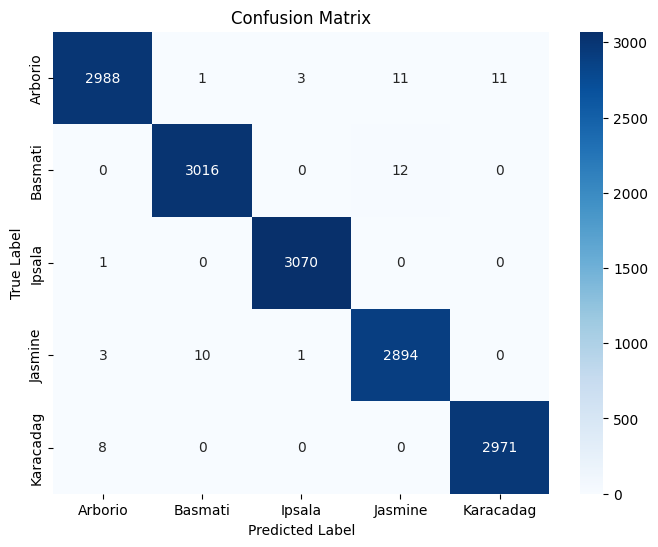

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt_20, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#CONFUSION MATRIX_Top20(RANDOM FOREST)
class_names = sorted(rice['CLASS'].unique())
cm_rf_20 = confusion_matrix(y_test, y_pred_rf_20,labels=class_names)

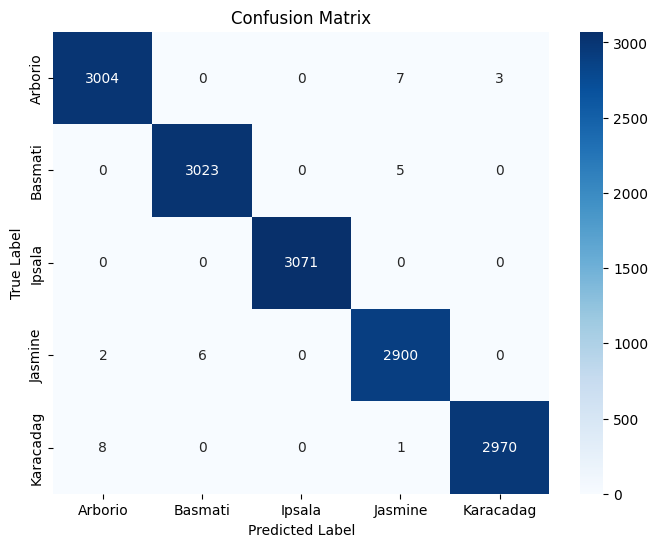

In [ ]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_20, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [25]:
#Model with PCA
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [23]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [26]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

In [33]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [34]:
y_pred = rf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))

Accuracy: 0.9965333333333334


In [35]:
#CONFUSION MATRIX_Top20(RANDOM FOREST)
class_names = sorted(rice['CLASS'].unique())
cm_rf_pca = confusion_matrix(y_test, y_pred,labels=class_names)

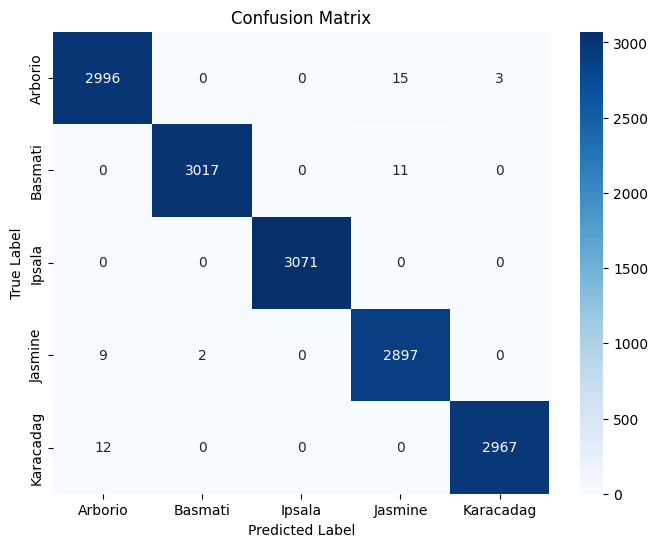

In [36]:
# Plotting the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf_pca, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()